29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 - 8s - 21ms/step - accuracy: 0.7910 - loss: 0.5828 - val_accuracy: 0.8512 - val_loss: 0.4198
Epoch 2/20
375/375 - 11s - 30ms/step - accuracy: 0.8466 - loss: 0.4188 - val_accuracy: 0.8624 - val_loss: 0.3737
Epoch 3/20
375/375 - 10s - 25ms/step - accuracy: 0.8599 - loss: 0.3815 - val_accuracy: 0.8746 - val_loss: 0.3531
Epoch 4/20
375/375 - 6s - 15ms/step - accuracy: 0.8681 - loss: 0.3616 - val_accuracy: 0.8762 - val_loss: 0.3371
Epoch 5/20
375/375 - 11s - 28ms/step - accuracy: 0.8720 - loss: 0.3441 - val_accuracy: 0.8790 - val_loss: 0.3354
Epoch 6/20
375/375 - 7s - 19ms/step - accuracy: 0.8798 - loss: 0.3272 - val_accuracy: 0.8796 - val_loss: 0.3312
Epoch 7/20
375/375 - 9s - 24ms/step - accuracy: 0.8832 - loss: 0.3146 - val_accuracy: 0.8756 - val_loss: 0.3332
Epoch 8/20
375/375 - 7s - 18ms/step - accuracy: 0.8853 - loss: 0.3072 - val_accuracy: 0.8841 - val_loss: 0.3184
Epoch 9/20
375/375 - 10s - 27ms/step - accuracy: 0.8895 - loss: 0.2949 - val_accuracy: 0.8870 - val_l

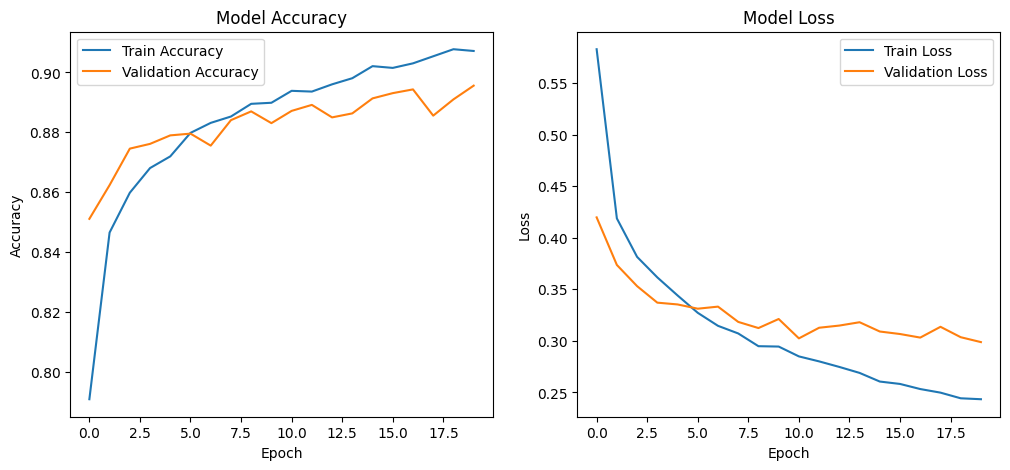

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


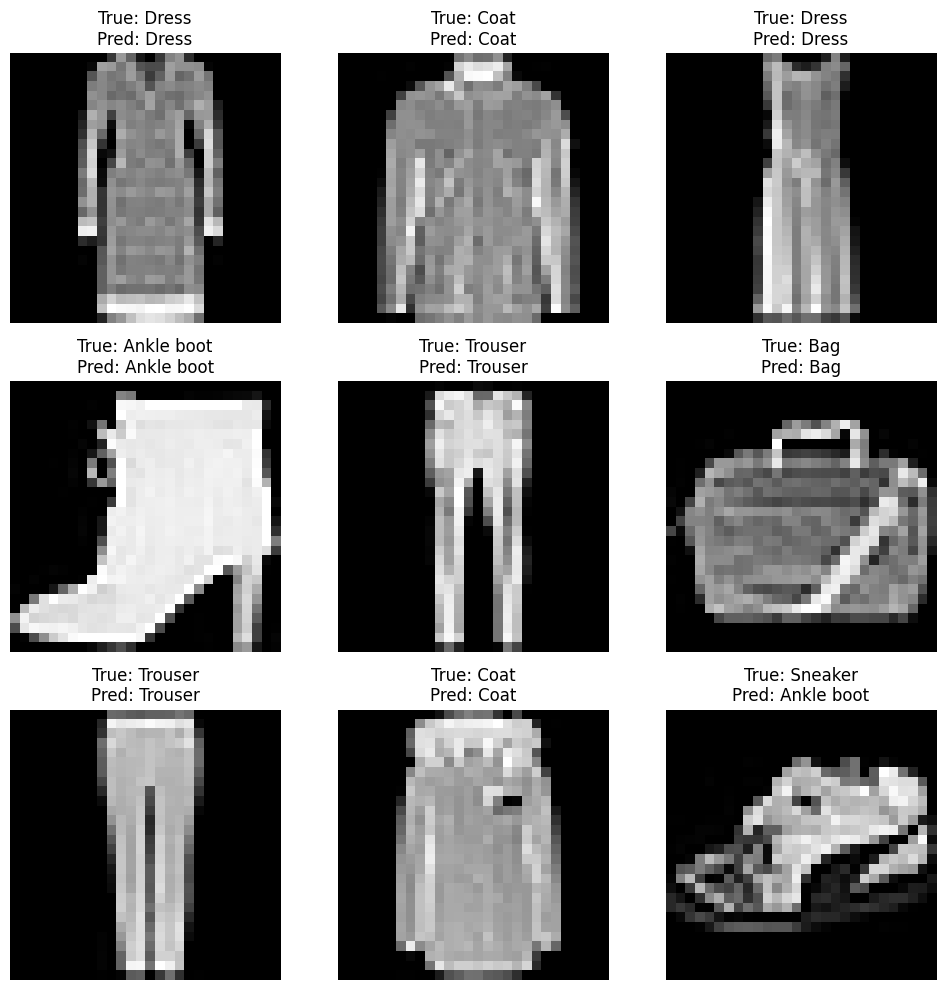

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0 to 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images from 28x28 to 784 vector (for dense layers)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the ANN model
model = Sequential()

# Input layer + first dense layer
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Second dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Optional: Predict and visualize some test images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import random

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, x_test.shape[0] - 1)
    img = x_test[idx].reshape(28, 28)
    true_label = np.argmax(y_test[idx])
    pred_label = np.argmax(model.predict(x_test[idx].reshape(1, -1)))

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
